In [191]:
import sys
import numpy as np
sys.path.append('../distance_compute')
sys.path.append('../preprocess')

In [192]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from distance_compute import config, filtered_data
config.setConfig(config.speciesType.mouse, config.chainType.alpha)
data = filtered_data()
print(data)

fetching data stage
            cdr3_a_aa     v_a_gene   j_a_gene  count
0       CAAAAGNTGKLIF  TRAV5N-4*01  TRAJ37*01      1
1        CAAAGGNNKLTF  TRAV5N-4*01  TRAJ56*01      1
2        CAAANSGTYQRF   TRAV3-1*01  TRAJ13*01      1
3        CAAANSGTYQRF  TRAV4N-3*01  TRAJ13*01      2
4     CAAANYGSSGNKLIF  TRAV14-2*02  TRAJ32*01      1
...               ...          ...        ...    ...
1436     CVVGRGNEKITF    TRAV11*02  TRAJ48*01      1
1437   CVVGRNNYAQGLTF    TRAV11*02  TRAJ26*01      1
1438      CVVGSNYQLIW    TRAV11*02  TRAJ33*01      1
1439  CVVGVGGSSGNKLIF    TRAV11*01  TRAJ32*01      1
1440     CVVQDSNYQLIW    TRAV11*02  TRAJ33*01      1

[1441 rows x 4 columns]


In [193]:
def replace_string_with_sum(data, column):
    
    characters = []
    # Get all the unique characters from the input string
    all_chars = set("".join(data[column].tolist()))

    # Add the missing characters to the characters list
    characters = list(set(characters + list(all_chars)))
    print(characters)

    char_map = {}
    for i, char in enumerate(characters):
        char_map[char] = i + 1
    print(char_map)

    # Replace the values in the input column with the sum of the values of each character in the string
    data[column] = data[column].map(lambda x: sum([char_map[c] for c in x]))
    return data

data = replace_string_with_sum(data, 'cdr3_a_aa')
data = replace_string_with_sum(data, 'v_a_gene')
data = replace_string_with_sum(data, 'j_a_gene')




['E', 'S', 'K', 'C', 'L', 'I', 'T', 'G', 'V', 'M', 'N', 'W', 'F', 'R', 'Q', 'A', 'H', 'Y', 'D', 'P']
{'E': 1, 'S': 2, 'K': 3, 'C': 4, 'L': 5, 'I': 6, 'T': 7, 'G': 8, 'V': 9, 'M': 10, 'N': 11, 'W': 12, 'F': 13, 'R': 14, 'Q': 15, 'A': 16, 'H': 17, 'Y': 18, 'D': 19, 'P': 20}
['5', '-', 'T', 'V', '3', '0', 'N', '2', '7', 'R', '1', '6', '4', '8', 'A', '*', 'D', '9', '/']
{'5': 1, '-': 2, 'T': 3, 'V': 4, '3': 5, '0': 6, 'N': 7, '2': 8, '7': 9, 'R': 10, '1': 11, '6': 12, '4': 13, '8': 14, 'A': 15, '*': 16, 'D': 17, '9': 18, '/': 19}
['5', 'T', 'R', '3', '1', '0', 'A', 'J', '6', '*', '9', '2', '7', '4', '8']
{'5': 1, 'T': 2, 'R': 3, '3': 4, '1': 5, '0': 6, 'A': 7, 'J': 8, '6': 9, '*': 10, '9': 11, '2': 12, '7': 13, '4': 14, '8': 15}
      cdr3_a_aa  v_a_gene  j_a_gene  count
0           129        88        58      1
1           118        88        51      1
2           140        83        50      1
3           140        92        50      2
4           139        96        57      1
...    

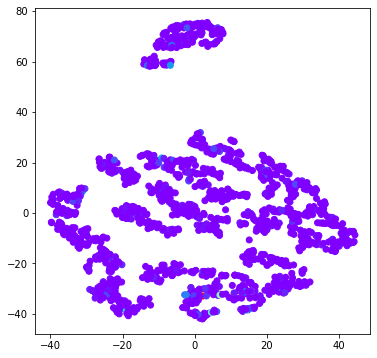

In [209]:
ncols = data.shape[1]
feature = data.values[:,0:ncols-1]
target = data.values[:,ncols-1]

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


def tsne_plot(feature, target):
    def fashion_scatter(x, colors):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.scatter(x[:,0], x[:,1], c=colors, cmap='rainbow')
        return fig, ax

    colors = target
    RS = 42
    tsne = TSNE(random_state=RS)
    X_tsne = tsne.fit_transform(feature)

    fig, ax = fashion_scatter(X_tsne, colors)
    plt.show()
    
tsne_plot(feature, target)

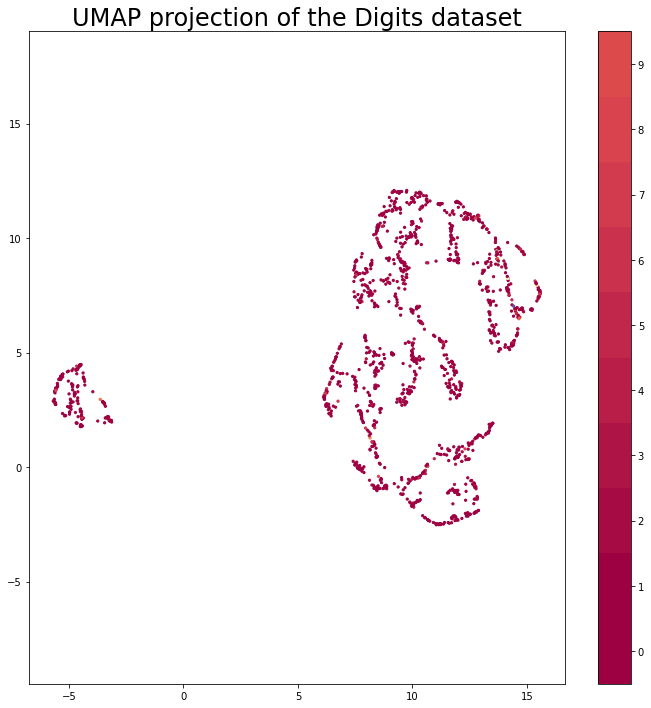

In [212]:
import umap
import matplotlib.pyplot as plt

def umap_plot(feature, target):

    umap_model = umap.UMAP()
    embedding = umap_model.fit_transform(feature_data)

    plt.figure(figsize=(12, 12))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=target, cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title('UMAP projection of the Digits dataset', fontsize=24);
    
umap_plot(feature, target)

In [214]:
from setup import config
from feature_filter import load_data
from label import generate_label
import feature_filter


AttributeError: 'Config' object has no attribute 'labelType'